# **`Business Understanding`**

Ride-hailing apps like Uber and Yassir rely on real-time data and machine learning algorithms to automate their services. Accurately predicting the estimated time of arrival (ETA) for Yassir trips will make Yassir’s services more reliable and attractive; this will have a direct and indirect impact on both customers and business partners. The solution would help the company save money and allocate more resources to other parts of the business.

**`The objective of this project is to predict the estimated time of arrival at the dropoff point for a single Yassir journey`**.

## **Analytical Question**

**1. Relationship Between Trip Distance and ETA:**


# **`Data Understanding`**

### **Train Data Columns Description** 
**ID:** Unique identifier for each trip.

**Timestamp:** The date and time when the trip occurred.

**Origin_lat:** Latitude of the starting location of the trip.

**Origin_lon:** Longitude of the starting location of the trip.

**Destination_lat:** Latitude of the destination location of the trip.

**Destination_lon:** Longitude of the destination location of the trip.

**Trip_distance:** The distance traveled along the fastest route for the trip.

### **Weather Data Columns Description**
**date:** Date of the weather data.

**dewpoint_2m_temperature:** Dewpoint 2m temperature (in Kelvin).

**maximum_2m_air_temperature:** Maximum 2m air temperature (in Kelvin).

**mean_2m_air_temperature:** Mean 2m air temperature (in Kelvin).

**mean_sea_level_pressure:** Mean sea level pressure (in Pa).

**minimum_2m_air_temperature:** Minimum 2m air temperature (in Kelvin).

**surface_pressure:** Surface pressure (in Pa).

**total_precipitation:** Total precipitation (in meters).

**u_component_of_wind_10m:** U component of wind at 10m above ground level (in m/s).

**v_component_of_wind_10m:** V component of wind at 10m above ground level (in m/s).

In [3]:
# Import Libraries
from matplotlib import pyplot as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Load train dataset
train = pd.read_csv(r'..\Yassir Data\Yassir_Train.csv')

train.head()

,ID,Timestamp,Origin_lat,Origin_lon,Destination_lat,Destination_lon,Trip_distance,ETA
0,000FLWA8,2019-12-04T20:01:50Z,3.258,36.777,3.003,36.718,39627,2784
1,000RGOAM,2019-12-10T22:37:09Z,3.087,36.707,3.081,36.727,3918,576
2,001QSGIH,2019-11-23T20:36:10Z,3.144,36.739,3.088,36.742,7265,526
3,002ACV6R,2019-12-01T05:43:21Z,3.239,36.784,3.054,36.763,23350,3130
4,0039Y7A8,2019-12-17T20:30:20Z,2.912,36.707,3.207,36.698,36613,2138


In [5]:
# Load weather dataset
weather = pd.read_csv(r'..\Yassir Data\Yassir_Weather.csv')

weather.head()

,date,dewpoint_2m_temperature,maximum_2m_air_temperature,mean_2m_air_temperature,mean_sea_level_pressure,minimum_2m_air_temperature,surface_pressure,total_precipitation,u_component_of_wind_10m,v_component_of_wind_10m
0,2019-11-01,290.630524,296.434662,294.125061,101853.617188,292.503998,100806.351562,0.004297,3.561323,0.941695
1,2019-11-02,289.135284,298.432404,295.551666,101225.164062,293.337921,100187.250000,0.001767,5.318593,3.258237
2,2019-11-03,287.667694,296.612122,295.182831,100806.617188,293.674316,99771.414062,0.000797,8.447649,3.172982
3,2019-11-04,287.634644,297.173737,294.368134,101240.929688,292.376221,100200.843750,0.000393,5.991428,2.236700
4,2019-11-05,286.413788,294.284851,292.496979,101131.750000,289.143066,100088.500000,0.004658,6.962730,2.655364


In [6]:
# Load sample submission data
sample_submission = pd.read_csv(r'..\Yassir Data\Yassir_SampleSubmission.csv')

sample_submission.sample(5)

,ID,ETA
14937,F4HAVP56,0
16986,HA4LUB8P,0
5837,5WDCK6FI,0
15930,G60U8XDI,0
4671,4QSO681M,0


## **Train Data Exploratory Data Analysis (EDA)**

In [7]:
# Get data information
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83924 entries, 0 to 83923
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               83924 non-null  object 
 1   Timestamp        83924 non-null  object 
 2   Origin_lat       83924 non-null  float64
 3   Origin_lon       83924 non-null  float64
 4   Destination_lat  83924 non-null  float64
 5   Destination_lon  83924 non-null  float64
 6   Trip_distance    83924 non-null  int64  
 7   ETA              83924 non-null  int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 5.1+ MB


In [8]:
# Describe the dataset
round(train.describe(), 2).T

,count,mean,std,min,25%,50%,75%,max
Origin_lat,83924.0,3.05,0.10,2.81,2.99,3.05,3.10,3.38
Origin_lon,83924.0,36.74,0.03,36.59,36.72,36.74,36.76,36.82
Destination_lat,83924.0,3.06,0.10,2.81,3.00,3.05,3.11,3.38
Destination_lon,83924.0,36.74,0.03,36.60,36.72,36.74,36.76,36.82
Trip_distance,83924.0,13527.82,9296.72,1.00,6108.00,11731.50,19369.00,62028.00
ETA,83924.0,1111.70,563.57,1.00,701.00,1054.00,1456.00,5238.00


In [9]:
# Check for duplicates
print(f"There are {train.duplicated().sum()} duplicates in the dataset")

There are 0 duplicates in the dataset


In [10]:
# Change timestamp to datetime
train['Timestamp'] = pd.to_datetime(train['Timestamp'])

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83924 entries, 0 to 83923
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   ID               83924 non-null  object             
 1   Timestamp        83924 non-null  datetime64[ns, UTC]
 2   Origin_lat       83924 non-null  float64            
 3   Origin_lon       83924 non-null  float64            
 4   Destination_lat  83924 non-null  float64            
 5   Destination_lon  83924 non-null  float64            
 6   Trip_distance    83924 non-null  int64              
 7   ETA              83924 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(4), int64(2), object(1)
memory usage: 5.1+ MB


In [11]:
# Split Timestamp to date and time
train['Date'] = train['Timestamp'].dt.date
train['Time'] = train['Timestamp'].dt.time

# Drop the Timestamp and ID columns
train.drop(['Timestamp','ID'], axis=1, inplace=True)

train.head()


,Origin_lat,Origin_lon,Destination_lat,Destination_lon,Trip_distance,ETA,Date,Time
0,3.258,36.777,3.003,36.718,39627,2784,2019-12-04,20:01:50
1,3.087,36.707,3.081,36.727,3918,576,2019-12-10,22:37:09
2,3.144,36.739,3.088,36.742,7265,526,2019-11-23,20:36:10
3,3.239,36.784,3.054,36.763,23350,3130,2019-12-01,05:43:21
4,2.912,36.707,3.207,36.698,36613,2138,2019-12-17,20:30:20


In [12]:
# Check for any missing dates
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83924 entries, 0 to 83923
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Origin_lat       83924 non-null  float64
 1   Origin_lon       83924 non-null  float64
 2   Destination_lat  83924 non-null  float64
 3   Destination_lon  83924 non-null  float64
 4   Trip_distance    83924 non-null  int64  
 5   ETA              83924 non-null  int64  
 6   Date             83924 non-null  object 
 7   Time             83924 non-null  object 
dtypes: float64(4), int64(2), object(2)
memory usage: 5.1+ MB


In [13]:
# Covert Date and Time columns to date and time
train['Date'] = pd.to_datetime(train['Date'])
train['Time'] = pd.to_datetime(train['Time'], format='%H:%M:%S').dt.time

train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83924 entries, 0 to 83923
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Origin_lat       83924 non-null  float64       
 1   Origin_lon       83924 non-null  float64       
 2   Destination_lat  83924 non-null  float64       
 3   Destination_lon  83924 non-null  float64       
 4   Trip_distance    83924 non-null  int64         
 5   ETA              83924 non-null  int64         
 6   Date             83924 non-null  datetime64[ns]
 7   Time             83924 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 5.1+ MB


In [14]:
# Check for missing dates
missing_dates = (pd.date_range(start=train['Date'].min(),
                               end=train['Date'].max(),
                                 freq='D').difference(train['Date']))
missing_dates

DatetimeIndex([], dtype='datetime64[ns]', freq='D')

In [15]:
# Set 'Date' as the index and sort it
train.set_index('Date', inplace=True)
train.sort_index(inplace=True)

# Display the first few rows
train.head()


,Origin_lat,Origin_lon,Destination_lat,Destination_lon,Trip_distance,ETA,Time
Date,,,,,,,
2019-11-19,3.013,36.718,3.010,36.758,6574,827,23:36:19
2019-11-19,3.016,36.779,3.051,36.736,13581,956,23:27:18
2019-11-19,3.105,36.737,3.185,36.720,9539,1102,23:59:01
2019-11-19,3.030,36.744,3.339,36.744,35841,1798,23:10:06
2019-11-19,3.059,36.772,3.186,36.721,14675,878,23:16:47


In [16]:
# Display the last few rows
train.tail()

,Origin_lat,Origin_lon,Destination_lat,Destination_lon,Trip_distance,ETA,Time
Date,,,,,,,
2019-12-19,2.961,36.768,3.010,36.770,5644,776,20:30:48
2019-12-19,2.910,36.793,2.950,36.668,19745,1358,23:12:25
2019-12-19,3.002,36.738,3.033,36.762,6038,883,20:53:37
2019-12-19,3.223,36.756,3.185,36.734,4619,531,22:20:31
2019-12-19,3.038,36.730,2.981,36.780,9538,1100,04:05:39


## **Key Insights**
- No missing data in the train dataset
- There are 83964 rows and 8 columns in the train dataset
- The average ETA is 1111.70
- There are 0 duplicates in the dataset
- Timestamp is an object instead of DateTime

### **Train Data Univarite Analysis**

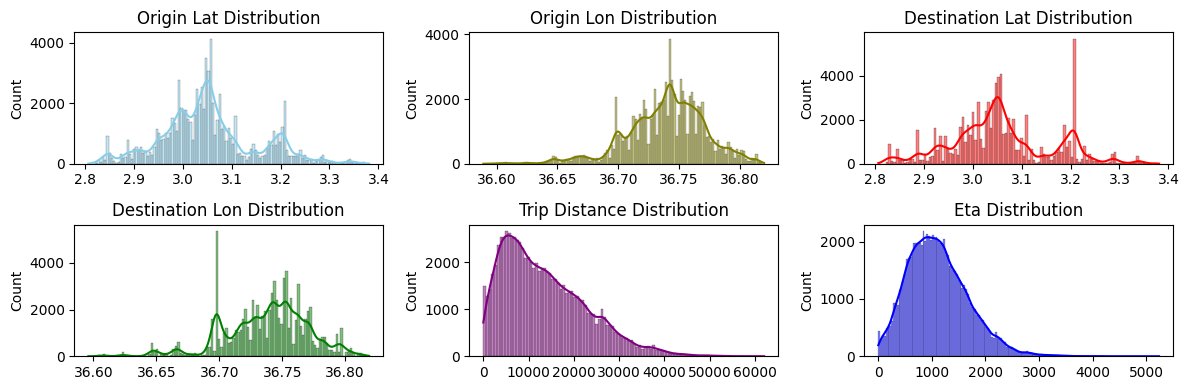

In [17]:
# Plot Histplots to show distribution of columns
fig, ax = plt.subplots(2, 3, figsize=(12, 4))

columns = train.select_dtypes(['float', 'int']).columns
colors = ['skyblue', 'olive', 'red', 'green', 'purple', 'blue']
titles = [f'{col.replace("_", " ").title()} Distribution' for col in columns]

for i in range(6):
    sns.histplot(train[columns[i]], ax=ax[i // 3, i % 3], kde=True, color=colors[i], fill=True)
    ax[i // 3, i % 3].set_xlabel('')  
    ax[i // 3, i % 3].set_title(titles[i])


plt.tight_layout()
plt.show()


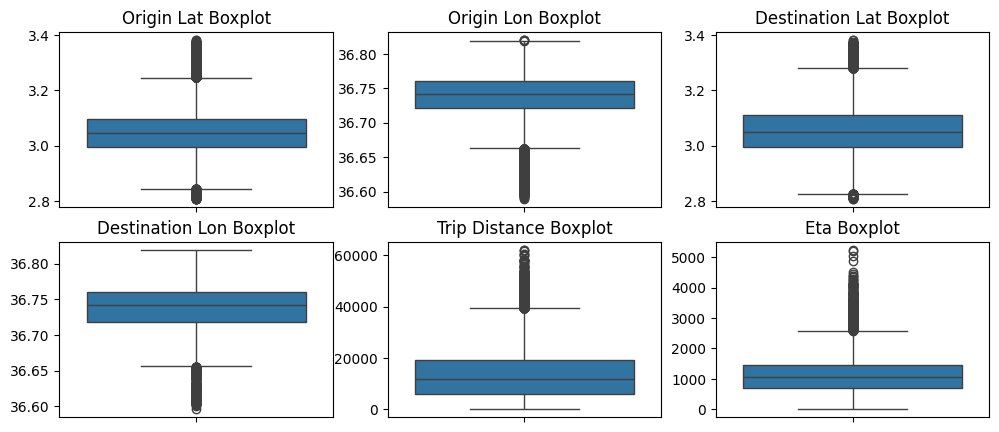

In [18]:
# Check for outliers
fig, ax = plt.subplots(2, 3, figsize=(12, 5))
titles = [f'{col.replace("_", " ").title()} Boxplot' for col in columns]

for i in range(6):
    sns.boxplot(train[columns[i]], ax=ax[i // 3, i % 3])
    ax[i // 3, i % 3].set_xlabel('')
    ax[i // 3, i % 3].set_ylabel('')

    ax[i // 3, i % 3].set_title(titles[i])


## **Notes**
- All the columns are anomaly distributed
- The columns are not in the same range of values hence this will call for standardization
- Trip distance data is negatively skewed
- Eta almost follows a normal distribution
- The rest of the columns are unevenly distributed


## **Weather Data Exploratory Data Analysis**

In [19]:
# Check weather data information
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   date                        61 non-null     object 
 1   dewpoint_2m_temperature     61 non-null     float64
 2   maximum_2m_air_temperature  61 non-null     float64
 3   mean_2m_air_temperature     61 non-null     float64
 4   mean_sea_level_pressure     61 non-null     float64
 5   minimum_2m_air_temperature  61 non-null     float64
 6   surface_pressure            61 non-null     float64
 7   total_precipitation         61 non-null     float64
 8   u_component_of_wind_10m     61 non-null     float64
 9   v_component_of_wind_10m     61 non-null     float64
dtypes: float64(9), object(1)
memory usage: 4.9+ KB


In [20]:
# Check for duplicates
print(f"There are {weather.duplicated().sum()} duplicates in the weather dataset")

There are 0 duplicates in the weather dataset


In [21]:
# Describe the data
weather.describe().T

,count,mean,std,min,25%,50%,75%,max
dewpoint_2m_temperature,61.0,283.363408,2.358220,2.791292e+02,281.457794,283.318756,284.806183,290.630524
maximum_2m_air_temperature,61.0,291.369271,2.517019,2.859896e+02,289.452942,291.216400,293.076416,298.432404
mean_2m_air_temperature,61.0,288.716775,2.453329,2.845190e+02,287.158081,288.396332,289.867828,295.551666
mean_sea_level_pressure,61.0,101603.430840,702.784872,1.001729e+05,101131.750000,101492.429688,102024.273438,103213.500000
minimum_2m_air_temperature,61.0,286.025376,2.670204,2.820376e+02,284.315369,285.601501,286.891205,293.674316
surface_pressure,61.0,100548.500897,694.103965,9.913338e+04,100088.500000,100441.507812,100969.460938,102129.195312
total_precipitation,61.0,0.002726,0.005519,-4.280000e-08,0.000009,0.000330,0.003459,0.029922
u_component_of_wind_10m,61.0,2.910408,3.487566,-5.210768e+00,-0.076007,3.561323,5.446436,9.466430
v_component_of_wind_10m,61.0,1.303809,1.588230,-2.041836e+00,0.448448,1.090132,2.437786,6.000363


In [22]:
# Change date to datetime
weather['date'] = pd.to_datetime(weather['date'])

weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   date                        61 non-null     datetime64[ns]
 1   dewpoint_2m_temperature     61 non-null     float64       
 2   maximum_2m_air_temperature  61 non-null     float64       
 3   mean_2m_air_temperature     61 non-null     float64       
 4   mean_sea_level_pressure     61 non-null     float64       
 5   minimum_2m_air_temperature  61 non-null     float64       
 6   surface_pressure            61 non-null     float64       
 7   total_precipitation         61 non-null     float64       
 8   u_component_of_wind_10m     61 non-null     float64       
 9   v_component_of_wind_10m     61 non-null     float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 4.9 KB


In [23]:
# Check for missing dates
missing_dates = (pd.date_range(start=weather['date'].min(),
                               end=weather['date'].max(),
                                 freq='D').difference(weather['date']))
missing_dates

DatetimeIndex([], dtype='datetime64[ns]', freq='D')

In [24]:
# Make date column the index
weather.set_index('date', inplace=True)

weather.sort_index(inplace=True)

# Display the first few rows
weather.head()

,dewpoint_2m_temperature,maximum_2m_air_temperature,mean_2m_air_temperature,mean_sea_level_pressure,minimum_2m_air_temperature,surface_pressure,total_precipitation,u_component_of_wind_10m,v_component_of_wind_10m
date,,,,,,,,,
2019-11-01,290.630524,296.434662,294.125061,101853.617188,292.503998,100806.351562,0.004297,3.561323,0.941695
2019-11-02,289.135284,298.432404,295.551666,101225.164062,293.337921,100187.250000,0.001767,5.318593,3.258237
2019-11-03,287.667694,296.612122,295.182831,100806.617188,293.674316,99771.414062,0.000797,8.447649,3.172982
2019-11-04,287.634644,297.173737,294.368134,101240.929688,292.376221,100200.843750,0.000393,5.991428,2.236700
2019-11-05,286.413788,294.284851,292.496979,101131.750000,289.143066,100088.500000,0.004658,6.962730,2.655364


In [25]:
# Display the last few rows
weather.tail()

,dewpoint_2m_temperature,maximum_2m_air_temperature,mean_2m_air_temperature,mean_sea_level_pressure,minimum_2m_air_temperature,surface_pressure,total_precipitation,u_component_of_wind_10m,v_component_of_wind_10m
date,,,,,,,,,
2019-12-27,282.856232,290.419464,286.725159,102797.125000,283.695648,101725.445312,0.000006,-2.667795,-0.424411
2019-12-28,281.909332,289.479797,285.969177,102934.476562,282.802826,101858.835938,0.000021,-2.372903,-0.184998
2019-12-29,281.217468,288.779541,285.632904,103071.937500,283.222504,101990.835938,0.000037,-2.151447,-0.673204
2019-12-30,279.548279,288.651001,285.355255,103127.242188,282.709595,102044.125000,0.000012,-2.287200,-0.562189
2019-12-31,279.129181,288.594666,285.817230,103213.500000,282.037567,102129.195312,0.000102,-0.851781,-0.921644


## **Key Insights**
- No missing dates in the weather data
- No missing values in the weather data

### **Weather Data Univariate Analysis**

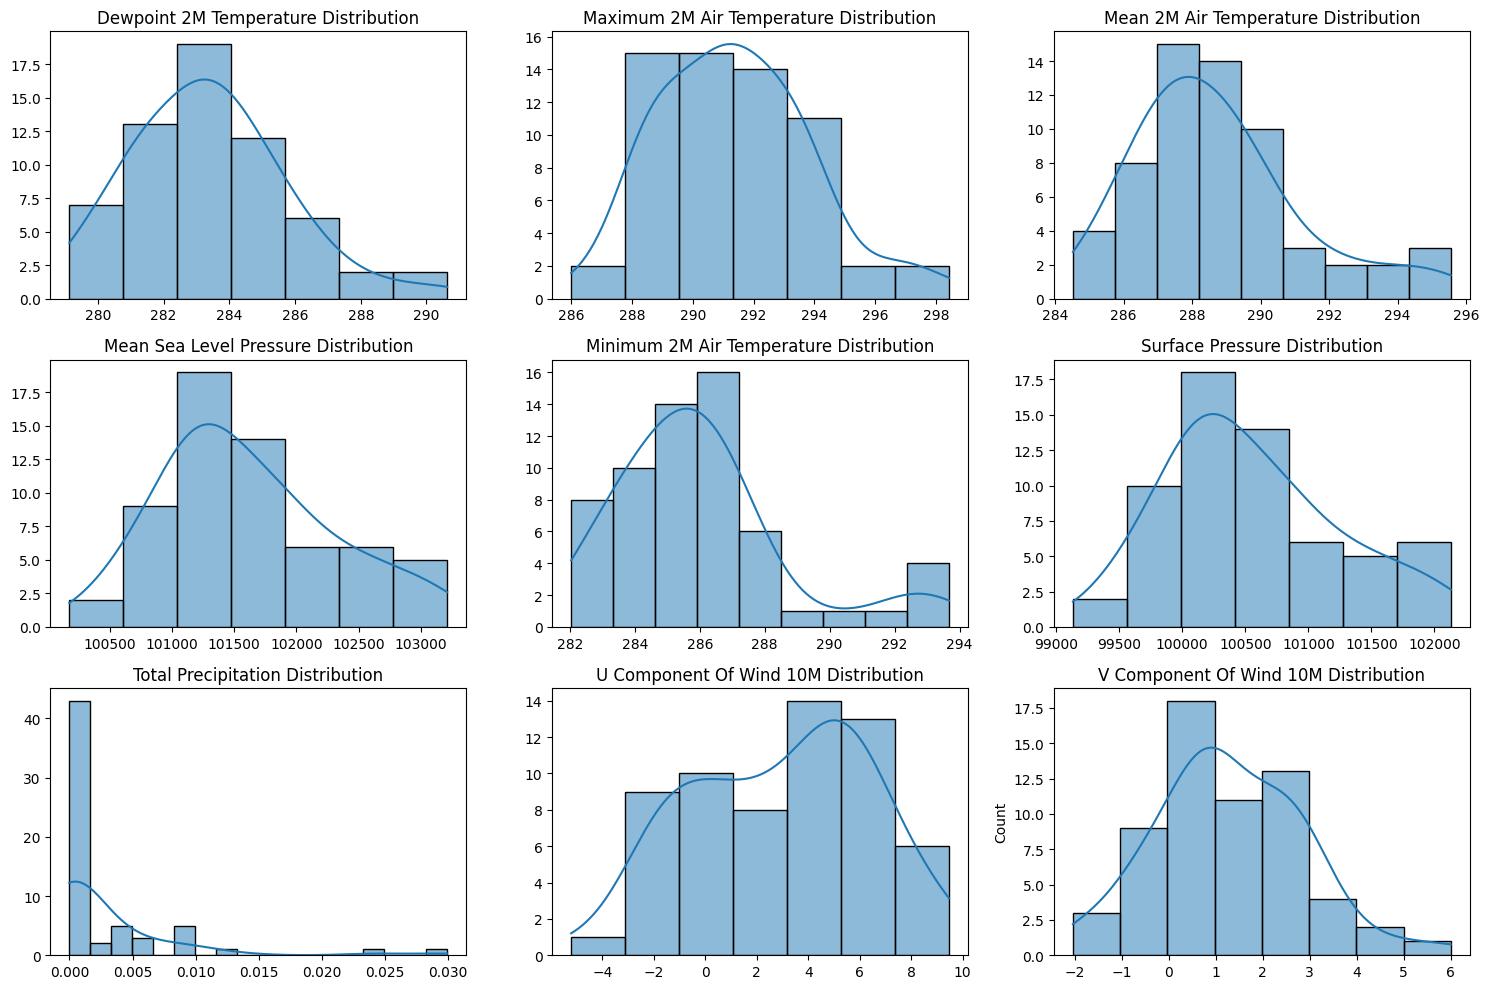

In [26]:
# Create 3 columns and 3 rows of subplots
fig, ax = plt.subplots(3, 3, figsize=(15, 10))

# Flatten the axes array for easy iteration
ax = ax.flatten()

# Create titles for each subplot
titles = [f'{col.replace("_", " ").title()} Distribution' for col in weather.columns[:9]]

# Plot each weather column
for i in range(9):
    sns.histplot(weather[weather.columns[i]], ax=ax[i], kde=True, fill=True)
    ax[i].set_xlabel('')
    ax[i].set_title(titles[i])
    if i != 8:  # Only the last subplot gets a y-axis label
        ax[i].set_ylabel('')
    
# Adjust layout for better spacing
fig.tight_layout()
plt.show()


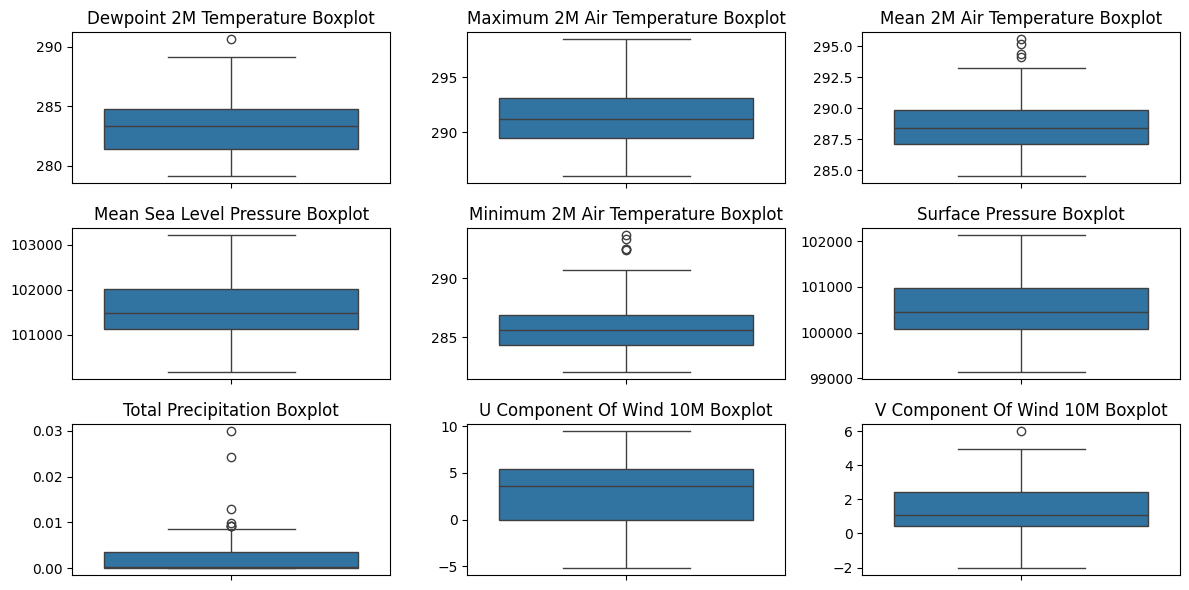

In [27]:
# Check for Outliers
fig, ax = plt.subplots(3, 3, figsize=(12, 6))

# Flatten the axes array for easy iteration
ax = ax.flatten()

# Create titles for each subplot
titles = [f'{col.replace("_", " ").title()} Boxplot' for col in weather.columns[:9]]

# Plot each weather column
for i in range(9):
    sns.boxplot(weather[weather.columns[i]], ax=ax[i])
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    ax[i].set_title(titles[i])

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

## **Notes**
- The columns are anomaly distributed. Some are postively skewed while other are negatively skewed
- Not so many outliers in the data. However Total precipitation column, V component of wind 10m column, minimum 2m air temperature column, mean 2m air temperature column and dewpoint 2m temperature have outliers

## **Bivariate Analysis**

In [28]:
# Merge the train dataset with the weather datstet
merged_data = train.merge(weather, how='inner', left_index=True, right_index=True)

merged_data.head()

,Origin_lat,Origin_lon,Destination_lat,Destination_lon,Trip_distance,ETA,Time,dewpoint_2m_temperature,maximum_2m_air_temperature,mean_2m_air_temperature,mean_sea_level_pressure,minimum_2m_air_temperature,surface_pressure,total_precipitation,u_component_of_wind_10m,v_component_of_wind_10m
2019-11-19,3.013,36.718,3.010,36.758,6574,827,23:36:19,281.222931,288.498199,285.203339,101709.28125,282.853973,100640.476562,0.003459,3.198985,0.879467
2019-11-19,3.016,36.779,3.051,36.736,13581,956,23:27:18,281.222931,288.498199,285.203339,101709.28125,282.853973,100640.476562,0.003459,3.198985,0.879467
2019-11-19,3.105,36.737,3.185,36.720,9539,1102,23:59:01,281.222931,288.498199,285.203339,101709.28125,282.853973,100640.476562,0.003459,3.198985,0.879467
2019-11-19,3.030,36.744,3.339,36.744,35841,1798,23:10:06,281.222931,288.498199,285.203339,101709.28125,282.853973,100640.476562,0.003459,3.198985,0.879467
2019-11-19,3.059,36.772,3.186,36.721,14675,878,23:16:47,281.222931,288.498199,285.203339,101709.28125,282.853973,100640.476562,0.003459,3.198985,0.879467


In [29]:
# Replace Time values with minutes from midnight
def convert_time_to_minutes(time):
    return time.hour * 60 + time.minute

merged_data['Time_minutes'] = merged_data['Time'].apply(convert_time_to_minutes)

merged_data.drop('Time', axis=1, inplace=True)

merged_data.head()

,Origin_lat,Origin_lon,Destination_lat,Destination_lon,Trip_distance,ETA,dewpoint_2m_temperature,maximum_2m_air_temperature,mean_2m_air_temperature,mean_sea_level_pressure,minimum_2m_air_temperature,surface_pressure,total_precipitation,u_component_of_wind_10m,v_component_of_wind_10m,Time_minutes
2019-11-19,3.013,36.718,3.010,36.758,6574,827,281.222931,288.498199,285.203339,101709.28125,282.853973,100640.476562,0.003459,3.198985,0.879467,1416
2019-11-19,3.016,36.779,3.051,36.736,13581,956,281.222931,288.498199,285.203339,101709.28125,282.853973,100640.476562,0.003459,3.198985,0.879467,1407
2019-11-19,3.105,36.737,3.185,36.720,9539,1102,281.222931,288.498199,285.203339,101709.28125,282.853973,100640.476562,0.003459,3.198985,0.879467,1439
2019-11-19,3.030,36.744,3.339,36.744,35841,1798,281.222931,288.498199,285.203339,101709.28125,282.853973,100640.476562,0.003459,3.198985,0.879467,1390
2019-11-19,3.059,36.772,3.186,36.721,14675,878,281.222931,288.498199,285.203339,101709.28125,282.853973,100640.476562,0.003459,3.198985,0.879467,1396


In [30]:
# Make all columns names lower case
merged_data.columns = merged_data.columns.str.lower()

merged_data.head()

,origin_lat,origin_lon,destination_lat,destination_lon,trip_distance,eta,dewpoint_2m_temperature,maximum_2m_air_temperature,mean_2m_air_temperature,mean_sea_level_pressure,minimum_2m_air_temperature,surface_pressure,total_precipitation,u_component_of_wind_10m,v_component_of_wind_10m,time_minutes
2019-11-19,3.013,36.718,3.010,36.758,6574,827,281.222931,288.498199,285.203339,101709.28125,282.853973,100640.476562,0.003459,3.198985,0.879467,1416
2019-11-19,3.016,36.779,3.051,36.736,13581,956,281.222931,288.498199,285.203339,101709.28125,282.853973,100640.476562,0.003459,3.198985,0.879467,1407
2019-11-19,3.105,36.737,3.185,36.720,9539,1102,281.222931,288.498199,285.203339,101709.28125,282.853973,100640.476562,0.003459,3.198985,0.879467,1439
2019-11-19,3.030,36.744,3.339,36.744,35841,1798,281.222931,288.498199,285.203339,101709.28125,282.853973,100640.476562,0.003459,3.198985,0.879467,1390
2019-11-19,3.059,36.772,3.186,36.721,14675,878,281.222931,288.498199,285.203339,101709.28125,282.853973,100640.476562,0.003459,3.198985,0.879467,1396


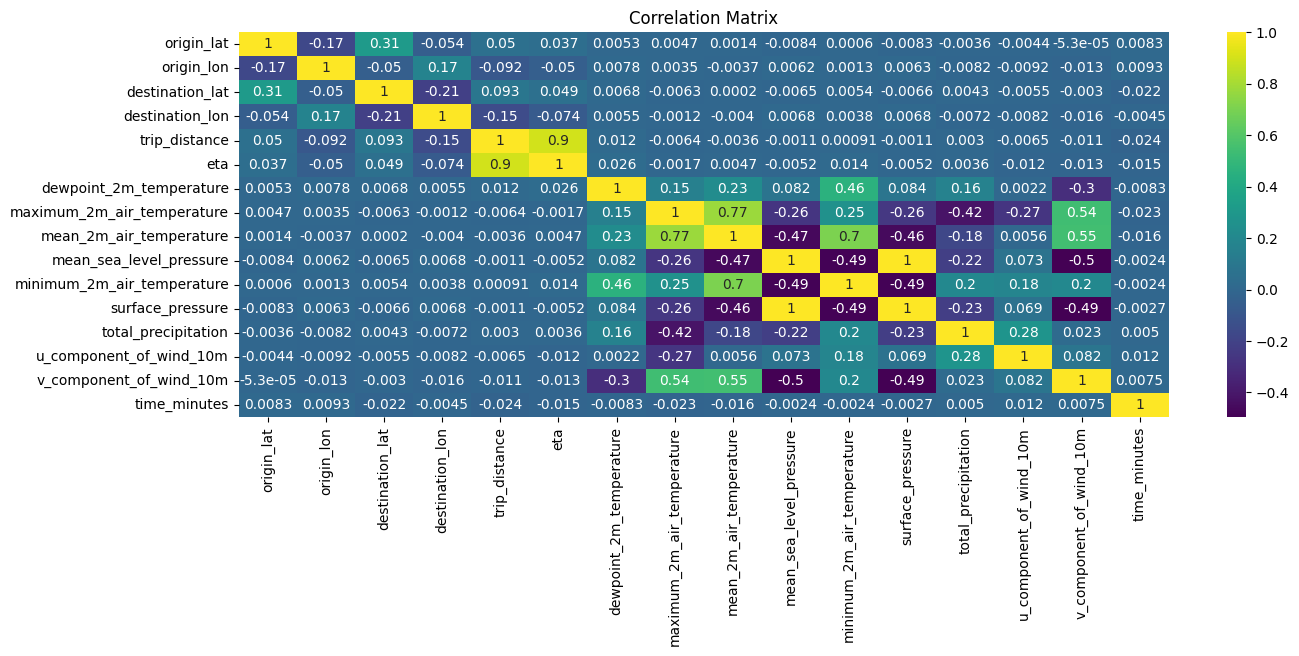

In [31]:
# Correlation Matrix to show correlation of of different classes
plt.figure(figsize=(15,	5))
sns.heatmap(merged_data.corr(), annot=True, cmap='viridis')
plt.title('Correlation Matrix')
plt.show()	

### **Key Correlation Observations:**

1. **Trip Distance and ETA**:
   - The strongest correlation is between `trip_distance` and `eta`, with a value of **0.9**. This indicates a very high positive correlation, meaning that longer trip distances are strongly associated with longer estimated times of arrival.

2. **Temperature and Wind Components**:
   - There is significant multicollinearity between temperature-related columns and wind components:
     - `maximum_2m_air_temperature` is highly correlated with `v_component_of_wind_10m` (0.54).
     - `mean_2m_air_temperature` is also correlated with `v_component_of_wind_10m` (0.55).
   - This suggests that changes in temperature are related to wind patterns, which could impact weather predictions.

3. **Pressure and Wind Correlation**:
   - `mean_sea_level_pressure` has a negative correlation with both `v_component_of_wind_10m` (-0.5) and `u_component_of_wind_10m` (-0.49). 
   - `surface_pressure` shows similar correlations with wind components, indicating that as pressure decreases, wind speed tends to increase, which is typical in meteorological conditions.

4. **Dewpoint Temperature**:
   - `dewpoint_2m_temperature` is correlated with `minimum_2m_air_temperature` (0.46) and other temperature metrics, showing that dew point is a reliable indicator of temperature and moisture content in the air.

### **Conclusion**:
- The dataset exhibits strong multicollinearity among several variables, particularly those related to distance, ETA, temperature, and wind components. This suggests that some variables may provide redundant information, which could impact modeling efforts if not addressed through techniques like PCA or variable selection.

## **Analytical Questions**

### **1. Relationship Between Trip Distance and ETA:**

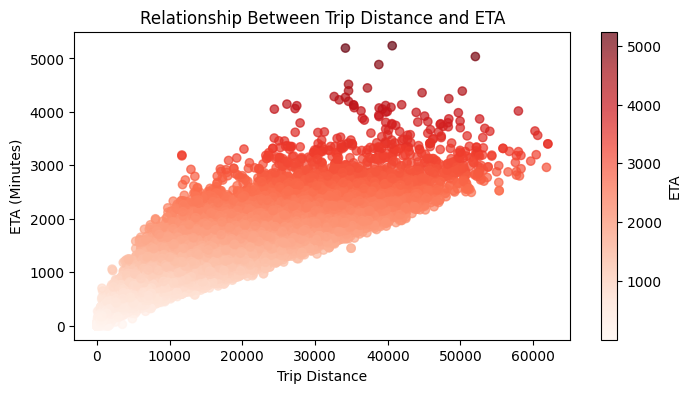

In [32]:
# Scatterplot to show relationship between ETA and Trip Distance
plt.figure(figsize=(8, 4))
scatter = plt.scatter(data=merged_data, x='trip_distance', y='eta', c=merged_data['eta'], cmap='Reds', alpha=0.7)
plt.xlabel('Trip Distance')
plt.ylabel('ETA (Minutes)')
plt.title('Relationship Between Trip Distance and ETA')
plt.colorbar(scatter, label='ETA')
plt.show()


## **Notes**
- The longer the trip, the higher tHE ETA
- This suggest that long distances tend to have the highest ETA